In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
N = 3
alpha = 0.01
gamma = 1
np.random.seed(0)

In [19]:
def rewardnstate(a, s):
    r, state, terminal = P[s][a]
    if s==1:
        r = r + np.random.uniform(-1, 1)
    return r, state, terminal

def act_functn(Q, state):
    eps = 0.1
    #eps = 1/np.power(state_visits[state], 0.2)
#     eps = 1/np.sqrt(state_visits[state])
#     state_visits[state] += 1
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q)
    else:
        action = np.random.choice(nAfes[state])
    return action

In [81]:
nAfes = [1, 8, 2]
def maxmin_q_train(N, epochs, alpha, gamma, rewardnstate, act_functn, P, seed):
    np.random.seed(seed)
    nS = 3
    nA = 8
    Q_list = []
    for i in range(N):
        Q = np.random.rand(nS, nA)
        Q_list.append(Q)
    Q_list = np.array(Q_list)
    Q_list[:, 0] = 0
    D = [] #replay buffer2
    diff_list = []
    len_d = 0
    for i in range(epochs):
        state = 2
        terminal = False
        #print(Q_list[1][0])
        while not terminal:
            Qmin = np.min(Q_list[:, state, :nAfes[state]], axis=0)
            action = act_functn(Qmin, state)
#             print(Qmin)
            r, next_state, terminal = rewardnstate(action, state)
            D.append((state, action, r, next_state))
            len_d += 1
            n = np.random.randint(N)
            sd, ad, rd, nsd  = D[np.random.choice(len_d)]
#             sd, ad, rd, nsd = state, action, r, next_state 
            Qmin = np.min(Q_list[:, nsd, :nAfes[nsd]], axis=0)
            Y = rd + gamma*np.max(Qmin)
            q = Q_list[n, sd, ad]
            Q_list[n, sd, ad] = q + alpha*(Y-q)
            state = next_state
        diff = 0.
        for i in range(N):
            diff += Q_list[i][2][0] - Q_list[i][2][1] #preference of left over right
        diff /= float(N)
        diff_list.append(diff)
    return diff_list, Q_list

In [82]:
Q_list = []
for i in range(N):
    Q = np.random.rand(3, 8)
    Q_list.append(Q)
Q_list = np.array(Q_list)
print(Q_list[:, 2, :nAfes[2]])

[[0.3995798  0.27817748]
 [0.82408744 0.63343138]
 [0.58600935 0.56425505]]


In [103]:
mu = 1
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}
diff_list_over, Q_list_over = maxmin_q_train(N = 10, epochs = 5000, 
                                             alpha = 0.01, gamma = 1,  
                                             rewardnstate = rewardnstate, 
                                             act_functn = act_functn, 
                                             P = P, seed = 0)

In [104]:
mu = -1
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}
diff_list_under, Q_list_under = maxmin_q_train(N = 4, epochs = 5000, 
                                               alpha = 0.01, gamma = 1,  
                                               rewardnstate = rewardnstate, 
                                               act_functn = act_functn, 
                                               P = P, seed = 0)

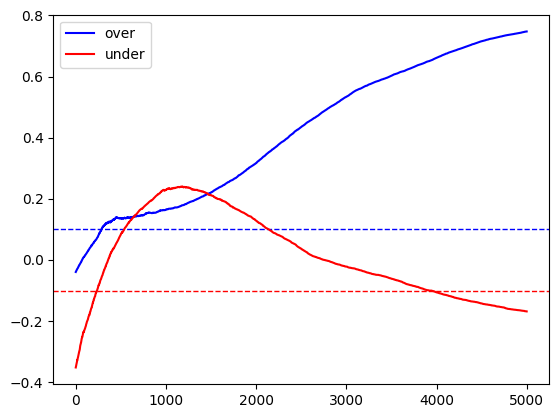

0.7477045464651761 -0.1683328212644948


In [105]:
plt.plot(diff_list_over, color = "b", label = "over")
plt.axhline(y = 0.1, color = "b", linestyle = "--", linewidth = 1)
plt.axhline(y = -0.1, color = "r", linestyle = "--", linewidth = 1)
plt.plot(diff_list_under, color = "r", label = "under")
plt.legend()
plt.show()
print(diff_list_over[-1], diff_list_under[-1])

# mu = 1, mu = -1

# 0.16413845575626063, 0.22977469936721467 1000 epochs 
# 0.5342581497100699, -0.02164709207862111 3000 epochs
# 0.7477045464651761, -0.1683328212644948  5000 epochs

In [14]:
np.mean(diff_list_under[2000:]) + 0.5

0.6634052379335809